In [66]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

In [116]:
# import data
df = pd.read_csv('germany.csv',header=None)
df

,0,1,2
0,532808.7,1,1995
1,536781.8,2,1995
2,537827.4,3,1995
3,537897.1,4,1995
4,533505.8,1,1996
...,...,...,...
98,745977.6,3,2019
99,745838.2,4,2019
100,731688.2,1,2020
101,660031.9,2,2020


In [37]:
# Define a function that will create a matrix K based on imported data

def Kmatrix(df):
    """
    Output: Returns the appropriate K matrix given imported dataframe
    
    Parameters
    ----------
    df is the dataframe you imported
    """    

    # Create Matrix K, where K is T-2 by T matrix
    K = np.zeros((len(df)-2,len(df)),dtype=int)

    # Set first diagonal to 1:
    for n in range(0,K.shape[0]):
        for i in range(0,K.shape[1]):
            if i==n:
                K[n][i] = 1

    # Set second diagonal to -2:
    for n in range(0,K.shape[0]):
        for i in range(0,K.shape[1]):
            if i==n+1:
                K[n][i] = -2

    # Set third diagonal to 1:
    for n in range(0,K.shape[0]):
        for i in range(0,K.shape[1]):
            if i==n+2:
                K[n][i] = 1
    
    return K

In [64]:
# Define a function that will create a matrix A based on imported data
def Amatrix(df,L):
    """
    Output: Returns the appropriate A matrix given imported dataframe
    
    Parameters
    ----------
    -df is the dataframe you imported
    -L is the smoothing parameter lambda 
    """    
    #create T by T matrix I
    I = np.zeros((len(df),len(df)),dtype=float)
    
    # Set first diagonal to 1:
    for n in range(0,I.shape[0]):
        for i in range(0,I.shape[1]):
            if i==n:
                I[n][i] = 1
                
    #create LK'K matrix:
    Lmatrix = L * Kmatrix(df).transpose() @ Kmatrix(df)
    
    #create resulting A matrix:
    A = I + Lmatrix
    
    return A 

In [100]:
# Create function that outputs dataframe of Y and Y_growth given input df and lambda parameter
def Y_growth_df(df,L):
    """
    Output: Returns the resulting dataframe of Y and Y_growth given input df and lambda parameter
    
    Parameters
    ----------
    -df is the dataframe you imported
    -L is the smoothing parameter lambda 
    """    
    #Before we can calculate Y_g, we need to transform input dataframe into appropriate Y matrix
    Y = df[0].to_numpy(dtype=float)
    
    # Y_g = inverse(A)*Y
    Y_g =  inv(Amatrix(df,1600)) @ Y
    
    # Reattach Y_g to original dataframe
    df_final = df
    df_final['Y_growth'] = Y_g
    df_final=df_final.rename(columns={0:'Y', 1:'Quarter',2:'Year'}) #rename columns
    df_final=df_final[['Year','Quarter','Y','Y_growth']] #organize columns
    
    return df_final

In [121]:
# Create the output results for Q3 parts c and d
output = Y_growth_df(df,1600)
output.to_csv('germany_result.csv',index=False)

<AxesSubplot:xlabel='Year', ylabel='Y'>

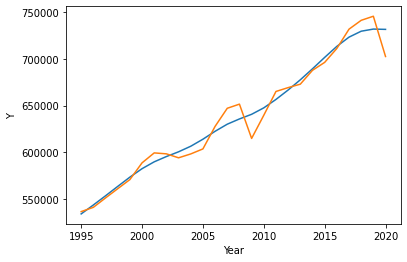

In [124]:
#Let's plot Y_growth vs Y
import seaborn as sns

sns.lineplot(output['Year'],output['Y_growth'],ci=None)
sns.lineplot(output['Year'],output['Y'],ci=None)